# **Data Preprocessing**

## **Data Wrangling**
- Handling missing values
- Remove duplicates
- Correct data types
- Normalize and scale data

In [113]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [114]:
df = pd.read_csv("clv_data.csv")
df.head()

,id,age,gender,income,days_on_platform,city,purchases
0,0,NaN,Male,126895,14.0,San Francisco,0
1,1,NaN,Male,161474,14.0,Tokyo,0
2,2,24.0,Male,104723,34.0,London,1
3,3,29.0,Male,43791,28.0,London,2
4,4,18.0,Female,132181,26.0,London,2


In [115]:
df.tail()

,id,age,gender,income,days_on_platform,city,purchases
4995,4995,NaN,Female,212261,28.0,San Francisco,1
4996,4996,NaN,Male,70228,12.0,San Francisco,0
4997,4997,NaN,Male,64995,14.0,New York City,0
4998,4998,NaN,Male,56144,4.0,New York City,2
4999,4999,NaN,Female,110977,29.0,London,0


In [116]:
df.shape

(5000, 7)

In [117]:
df.isnull().sum()

id                     0
age                 2446
gender                 0
income                 0
days_on_platform     141
city                   0
purchases              0
dtype: int64

Visualizing missing data

<Axes: >

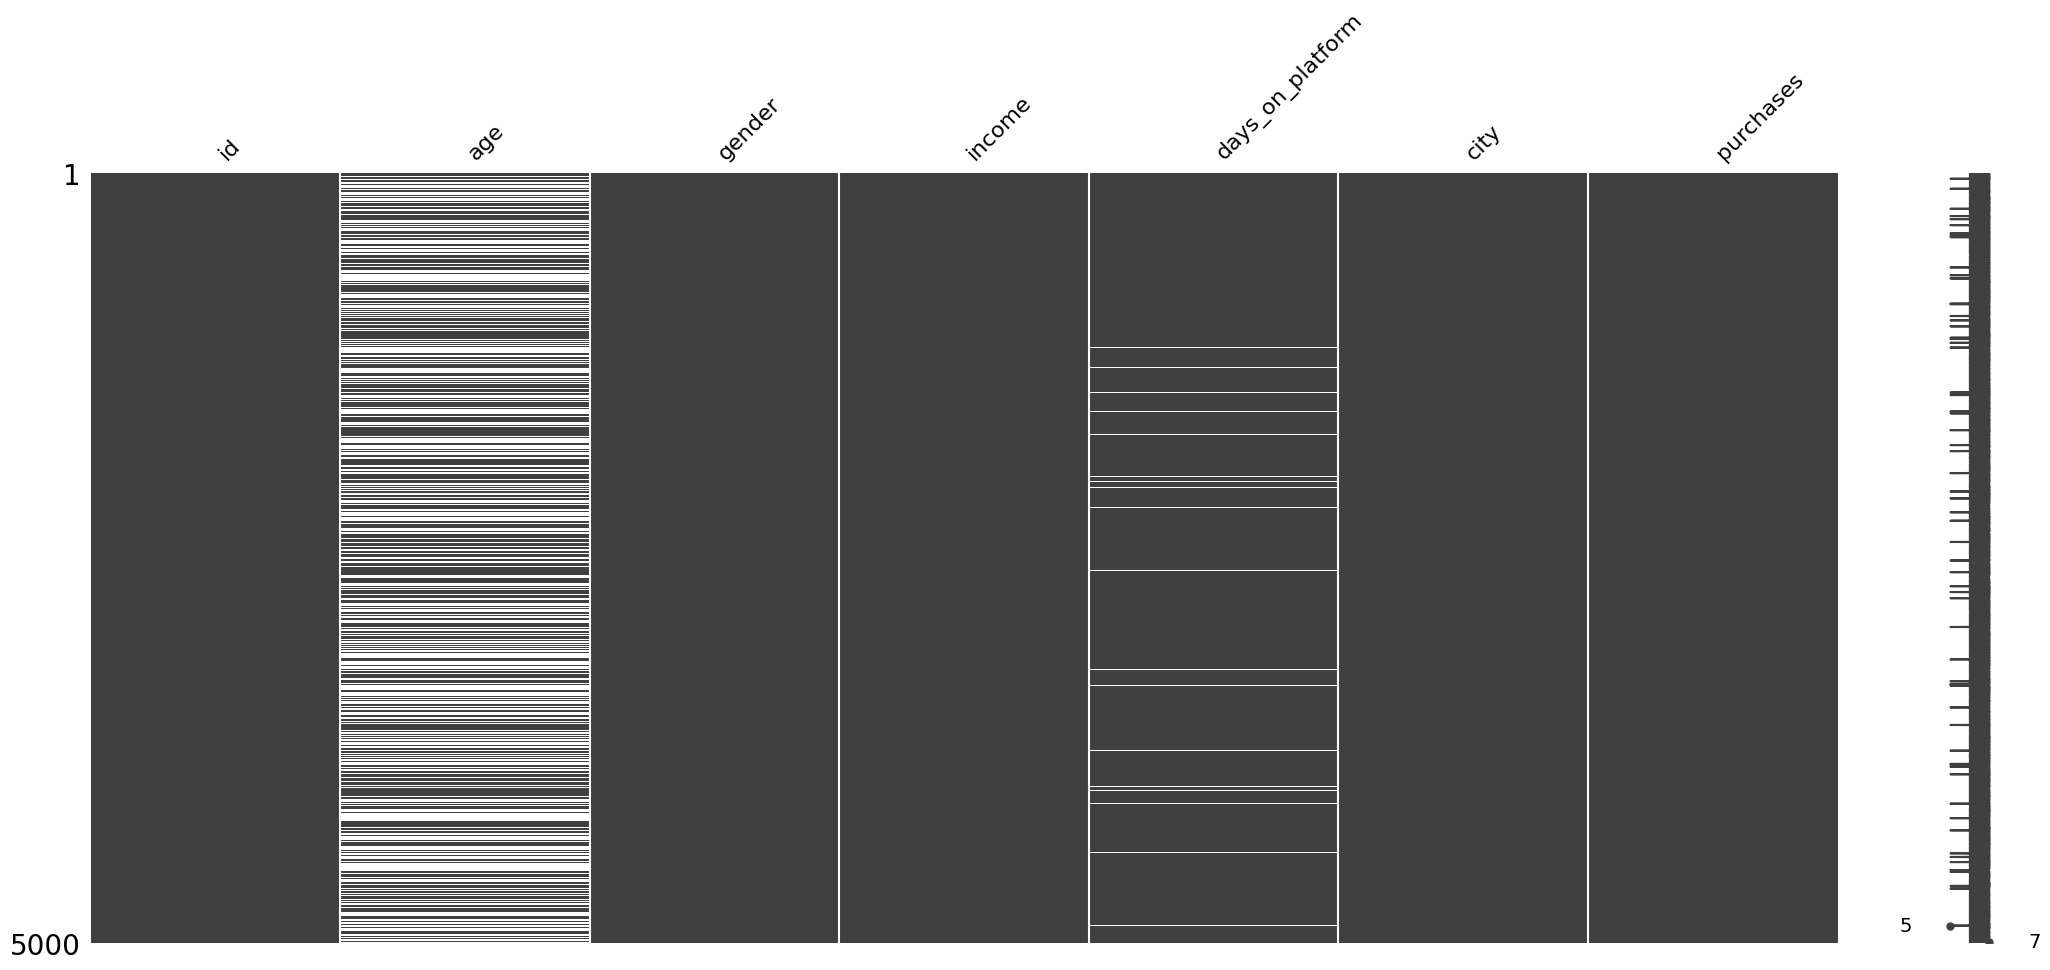

In [118]:
#Using missingno library
import missingno as mp
mp.matrix(df)

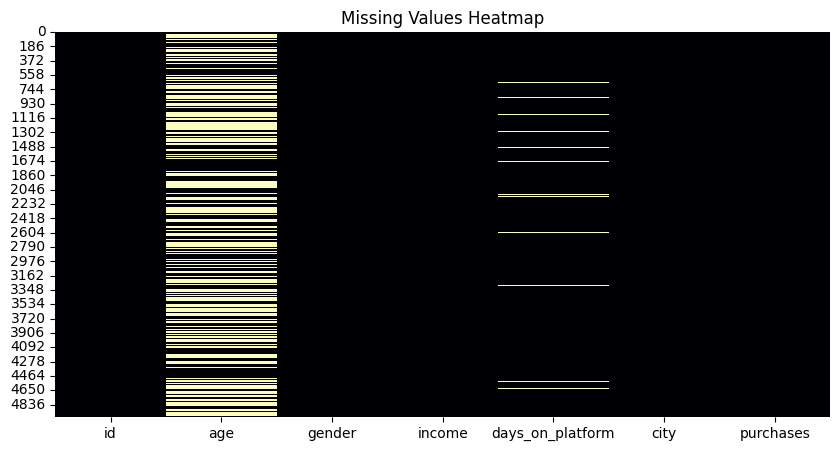

In [119]:
#Using seaborn
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")
plt.title("Missing Values Heatmap")
plt.show()

Here, two columns 'age' and 'days_on_platform' have missing values with 'age' missing a lot of values and 'days_on_platform' missing only a few values. We will use two different methods to handle the missing values.

Remove 'age' column in place as it has lot of missing values

In [120]:
df.drop(['age'], axis=1, inplace=True)
df.head()

,id,gender,income,days_on_platform,city,purchases
0,0,Male,126895,14.0,San Francisco,0
1,1,Male,161474,14.0,Tokyo,0
2,2,Male,104723,34.0,London,1
3,3,Male,43791,28.0,London,2
4,4,Female,132181,26.0,London,2


In [121]:
df.isnull().sum()

id                    0
gender                0
income                0
days_on_platform    141
city                  0
purchases             0
dtype: int64

Modify the original dataset to replace null values with median in 'days_on_platoform' column

In [122]:
df['days_on_platform'] = df['days_on_platform'].fillna(df['days_on_platform'].median())
df.isnull().sum()

id                  0
gender              0
income              0
days_on_platform    0
city                0
purchases           0
dtype: int64

<Axes: >

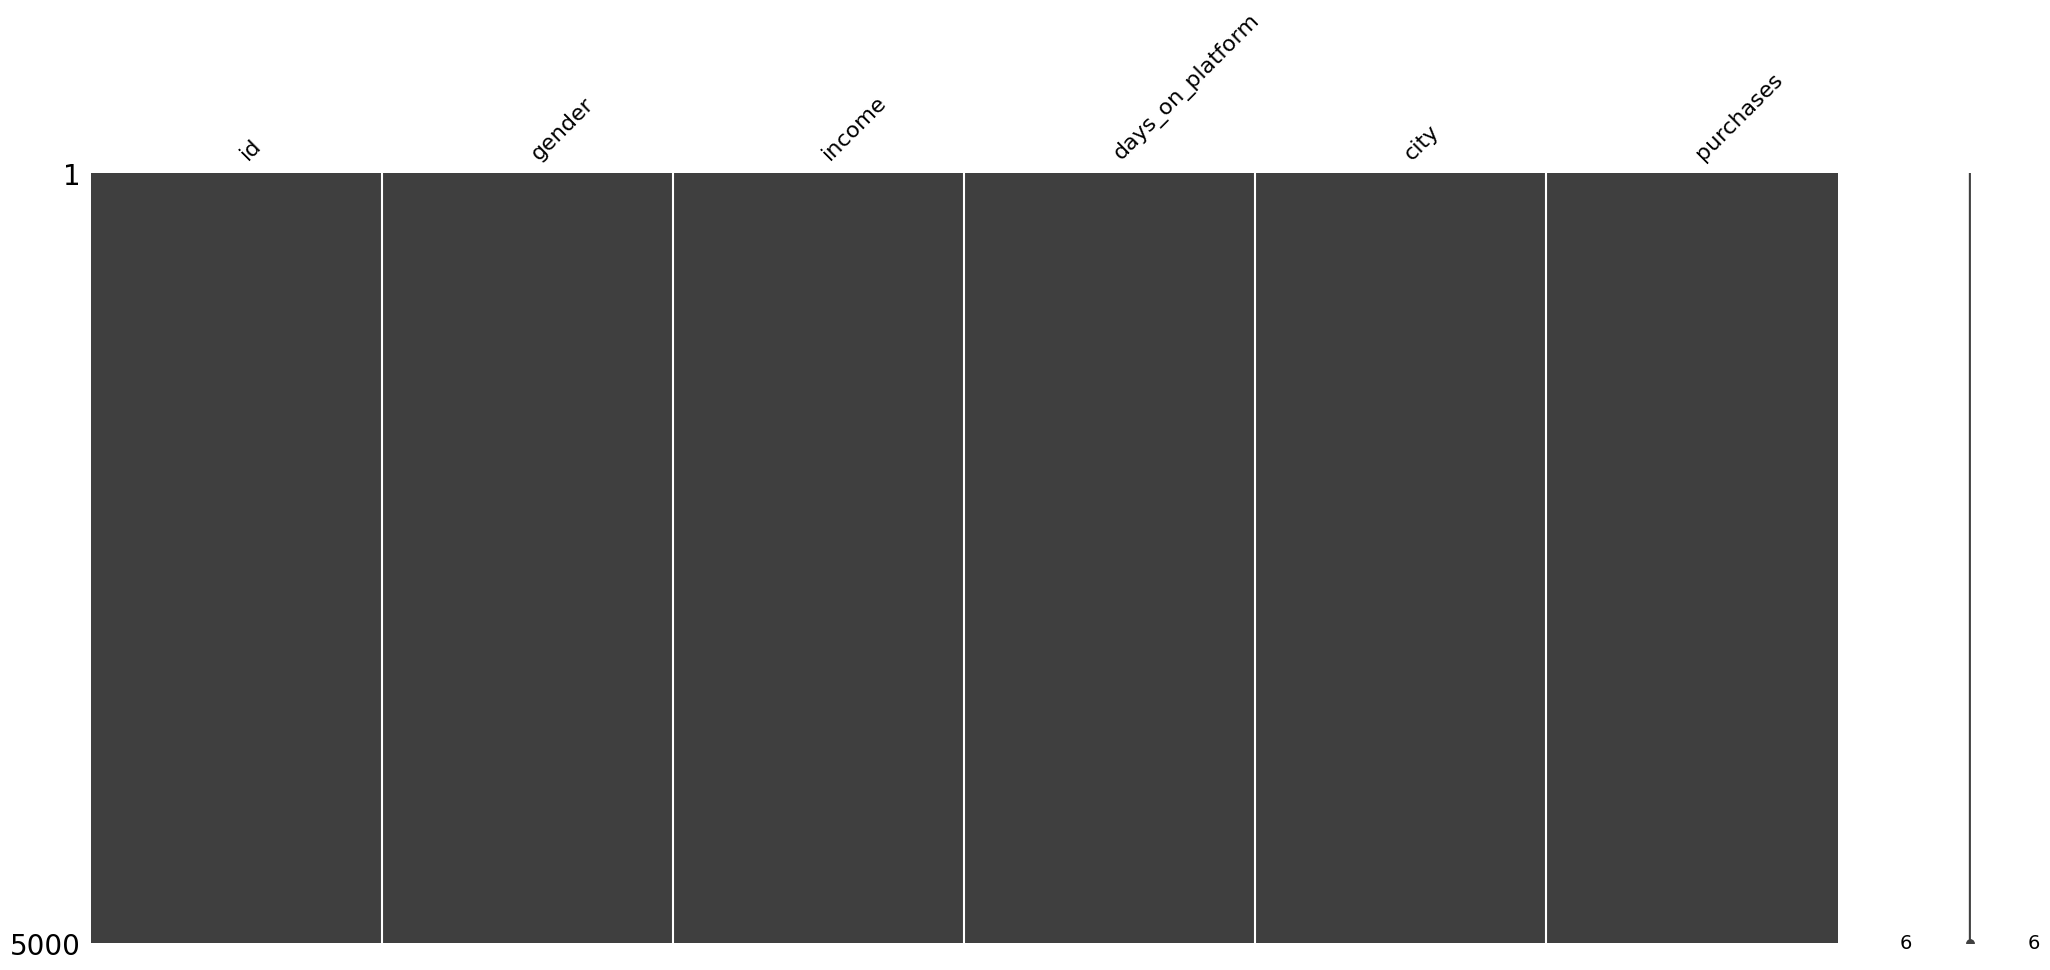

In [123]:
mp.matrix(df)

In [124]:
df.describe()

,id,income,days_on_platform,purchases
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,79593.336200,24.294400,1.101000
std,1443.520003,60304.056095,17.904341,1.181473
min,0.000000,4.000000,1.000000,0.000000
25%,1249.750000,32752.500000,10.000000,0.000000
50%,2499.500000,65989.000000,21.000000,1.000000
75%,3749.250000,115406.500000,34.000000,2.000000
max,4999.000000,388572.000000,111.000000,6.000000


Here, we have handled all the missing values

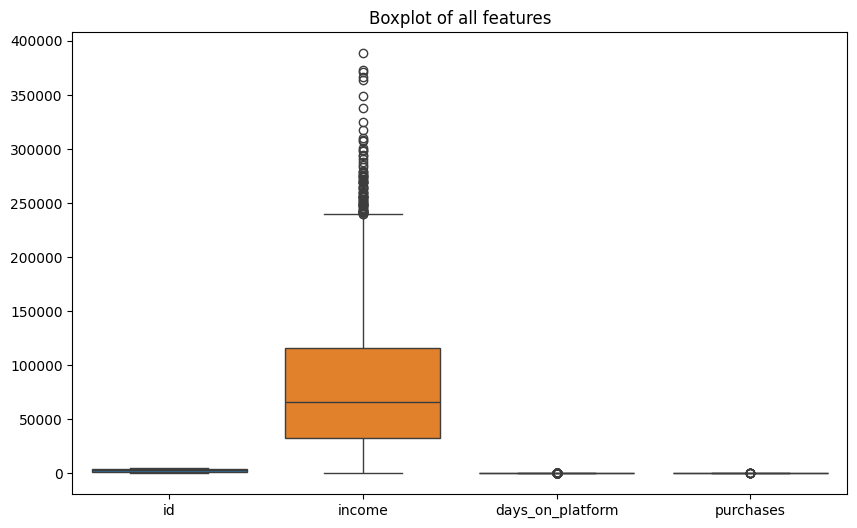

In [125]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

plt.title("Boxplot of all features")

plt.show()

Using different scaling methods to normalize data.

<Axes: xlabel='days_on_platform', ylabel='Count'>

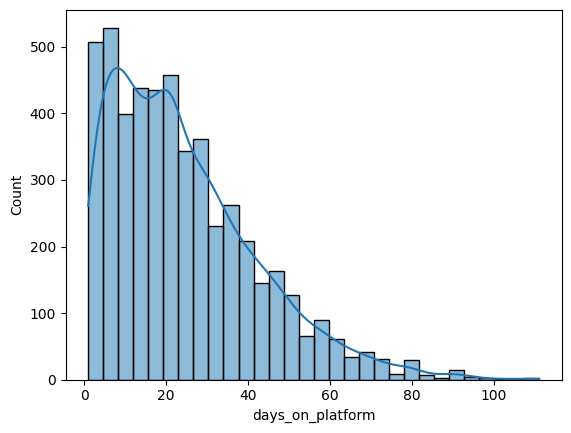

In [126]:
sns.histplot(df['days_on_platform'], kde=True, bins=30)

<Axes: xlabel='days_robust_scaled', ylabel='Count'>

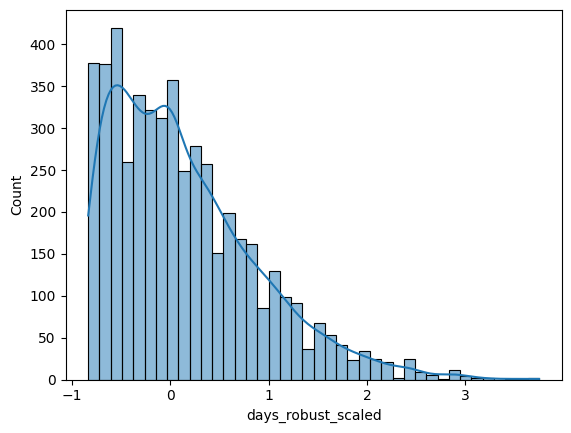

In [127]:
from sklearn.preprocessing import RobustScaler

# Apply RobustScaler
scaler = RobustScaler()
df['days_robust_scaled'] = scaler.fit_transform(df[['days_on_platform']])

sns.histplot(df['days_robust_scaled'],kde=True)


<Axes: xlabel='days_MinMax_scaled', ylabel='Count'>

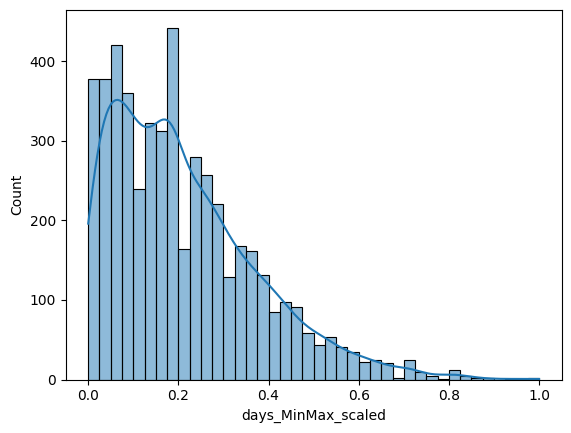

In [128]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler
scaler = MinMaxScaler()
df['days_MinMax_scaled'] = scaler.fit_transform(df[['days_on_platform']])

sns.histplot(df['days_MinMax_scaled'],kde=True)


<Axes: xlabel='days_StandardScaler_scaled', ylabel='Count'>

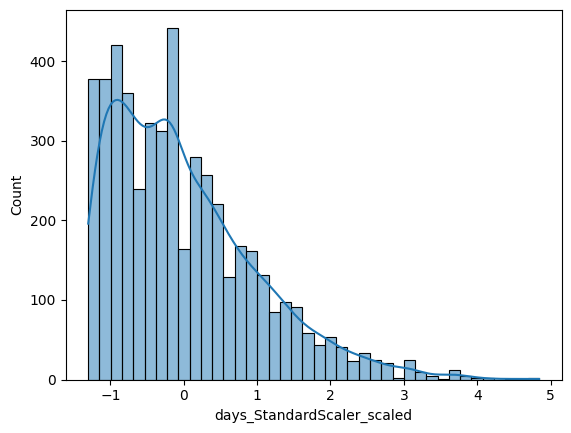

In [129]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler
scaler = StandardScaler()
df['days_StandardScaler_scaled'] = scaler.fit_transform(df[['days_on_platform']])

sns.histplot(df['days_StandardScaler_scaled'],kde=True)

<Axes: xlabel='days_log_transformed', ylabel='Count'>

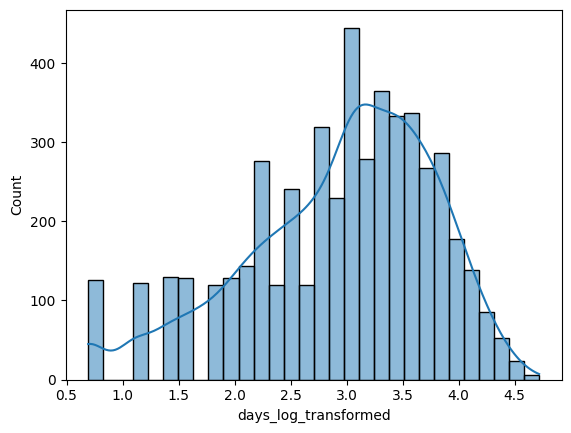

In [130]:
df['days_log_transformed'] = np.log1p(df['days_on_platform'])

sns.histplot(df['days_log_transformed'],kde=True)

Here we can clearly see that among the various techniques applied: Robust Scaling, MinMax Scaling, Standard Scaling and Log Transformation, the log transformation was the most succesful. It produces a more normalized data, whereas other methods provided outputs which resembeled the original dtaset.

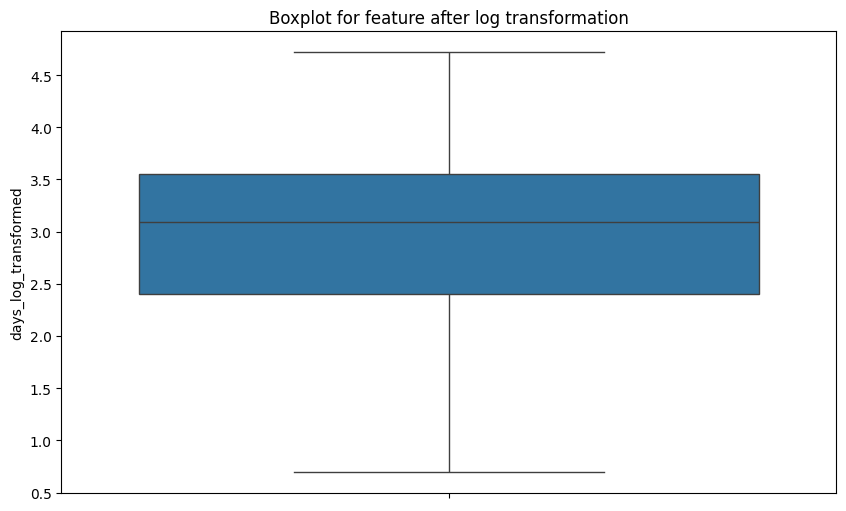

In [131]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df['days_log_transformed'])
plt.title("Boxplot for feature after log transformation")
plt.show()

Hence, we succesfully loaded a dataset, handled missing values and used different scaling methods to normalize data.